In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
akarsu_df = pd.read_csv('../RelevantData/akarsu_relevant.csv')
deniz_df = pd.read_csv('../RelevantData/deniz_relevant.csv')
gol_df = pd.read_csv('../RelevantData/gol_relevant.csv')
aritma_df = pd.read_csv('../RelevantData/aritma_relevant.csv')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
akarsu_outliers = ['Fekal_Koliform', 'Toplam_Koliform', 'Toplam_Fosfor', 'Toplam_Kjeldahl_Azotu', 'Kimyasal_Oksijen_İhtiyacı', 'Nitrat_Azotu', 'Çözünmüş_Oksijen']
gol_outliers = ['Toplam_Fosfor', 'Toplam_Azot', 'Klorofil']
deniz_outliers = ['Toplam_Koliform', 'Fekal_Koliform', 'Amonyak', 'Fekal_Streptokok']
aritma_outliers = ['Biyokimyasal_Oksijen_İhtiyacı', 'Kimyasal_Oksijen_İhtiyacı', 'Toplam_Fosfor', 'Toplam_Azot']

In [5]:
akarsu_df.isna().sum()

Tarih                         925
Numune_Adı                     21
Fekal_Koliform               1777
Toplam_Koliform              1798
Toplam_Fosfor                1774
Toplam_Kjeldahl_Azotu        2371
Toplam_Pestisit              7004
Kimyasal_Oksijen_İhtiyacı    1839
Nitrat_Azotu                 1761
Çözünmüş_Oksijen             1742
dtype: int64

In [6]:
# Removing Toplam_Pestisit column because 90% of it is empty.
akarsu_df = akarsu_df.drop(columns = 'Toplam_Pestisit')
# Dropping missing features
akarsu_df = akarsu_df.dropna()

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
q_min = pd.DataFrame(akarsu_df.quantile(0))
q_01 = pd.DataFrame(akarsu_df.quantile(0.1))
q_09 = pd.DataFrame(akarsu_df.quantile(0.9))
q_max = pd.DataFrame(akarsu_df.quantile(1))
q_df = pd.concat([q_min, q_01, q_09, q_max], axis = 1)
q_df

,0.00,0.10,0.90,1.00
Fekal_Koliform,0.00,0.00,20000.00,3200000.00
Toplam_Koliform,0.00,0.00,70000.00,6100000.00
Toplam_Fosfor,0.00,0.01,0.65,7.60
Toplam_Kjeldahl_Azotu,0.00,0.10,7.70,96.00
Kimyasal_Oksijen_İhtiyacı,0.00,5.00,59.00,975.60
Nitrat_Azotu,0.00,0.02,1.96,1583.00
Çözünmüş_Oksijen,0.00,66.80,116.40,404.60


In [8]:
akarsu_df.describe()

,Fekal_Koliform,Toplam_Koliform,Toplam_Fosfor,Toplam_Kjeldahl_Azotu,Kimyasal_Oksijen_İhtiyacı,Nitrat_Azotu,Çözünmüş_Oksijen
count,5352.00,5352.00,5352.00,5352.00,5352.00,5352.00,5352.00
mean,9888.81,28588.33,0.22,2.32,26.76,1.11,92.48
std,59343.41,123902.77,0.50,4.68,43.89,21.67,27.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.00,45.00,0.01,0.18,9.00,0.14,80.70
50%,100.00,1100.00,0.04,0.50,15.00,0.42,93.80
75%,2000.00,12000.00,0.20,1.47,26.00,1.03,103.90
max,3200000.00,6100000.00,7.60,96.00,975.60,1583.00,404.60


<AxesSubplot:>

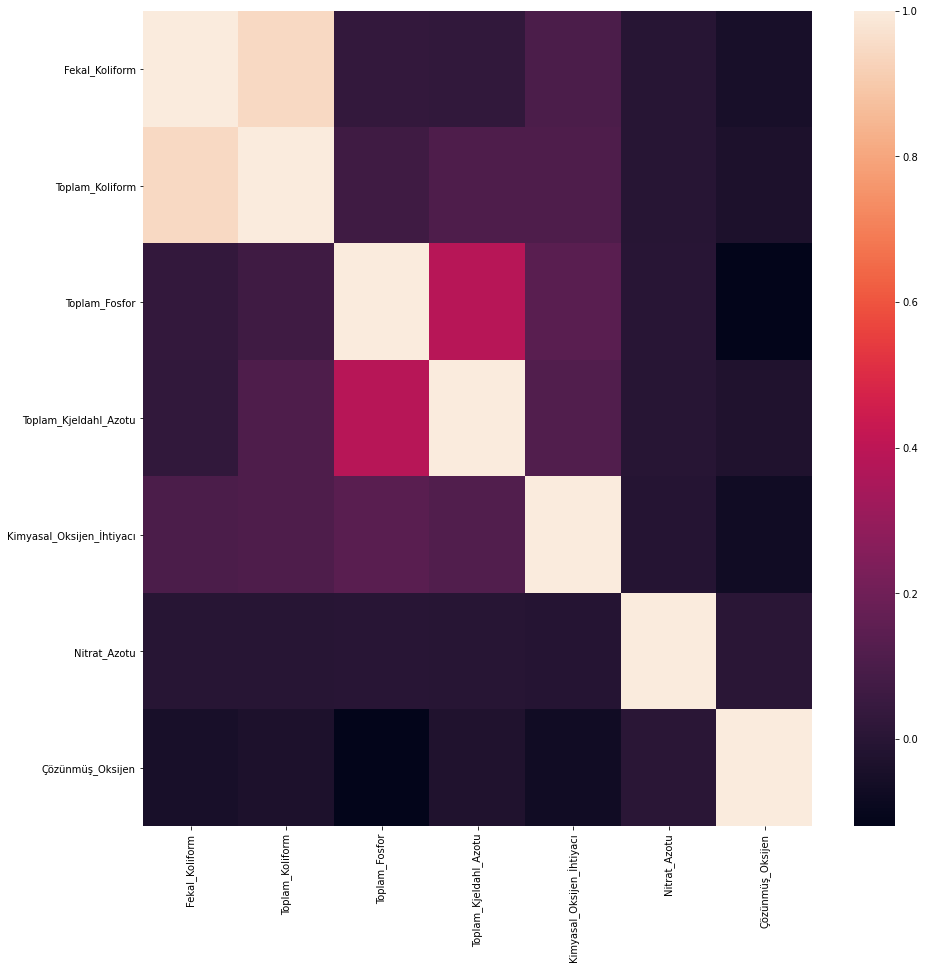

In [9]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(akarsu_df.corr(), ax = ax)
# Toplantı notları:
# kjedahl, nitrat, amonyum doğru orantılı
# sıkcalık ile oksijen ters orantılı
# azot varsa fosfor da nitrit ile beraber artar, nitrat düşer
# nitrat çok fazla varsa kirlilik var
# toplam kolfiorm ve fekal koliform doğru orantılı

<AxesSubplot:>

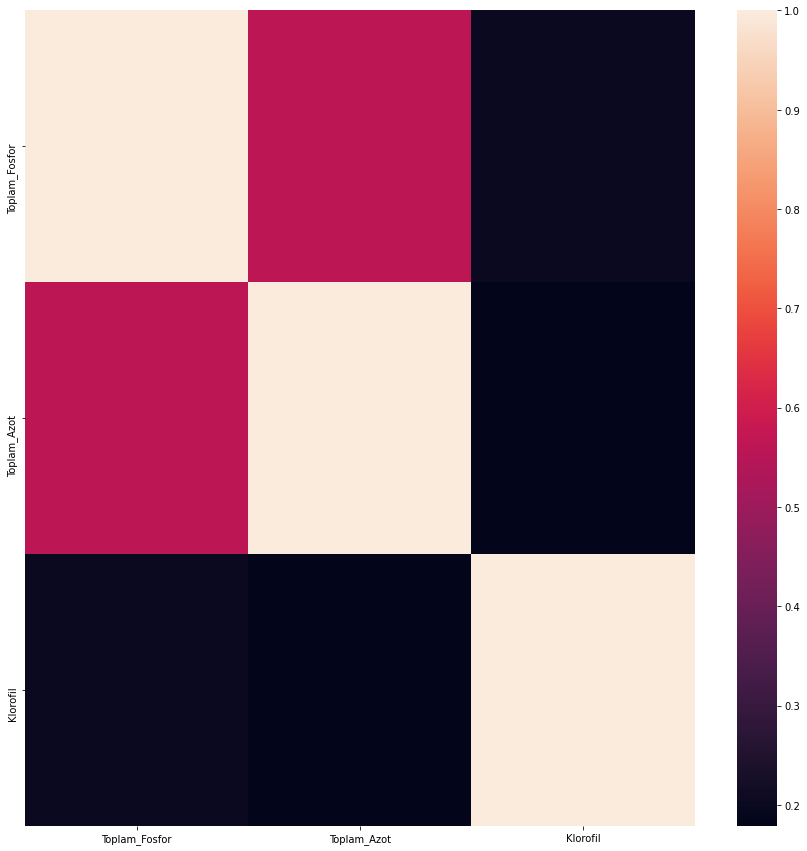

In [10]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(gol_df.corr(), ax = ax)

<AxesSubplot:>

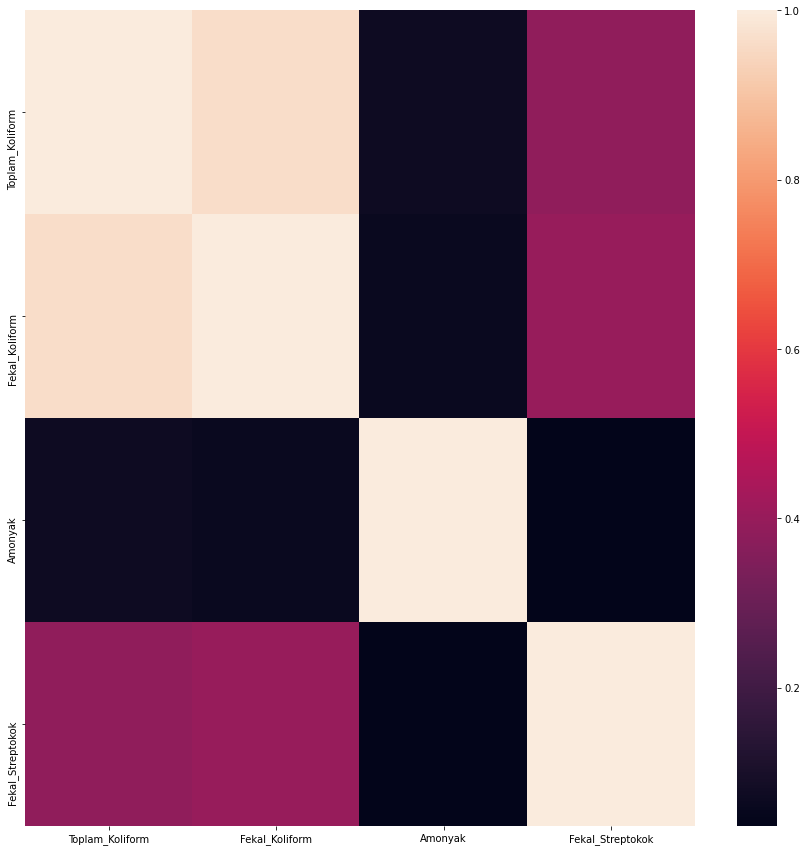

In [11]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(deniz_df.corr(), ax = ax)

<AxesSubplot:>

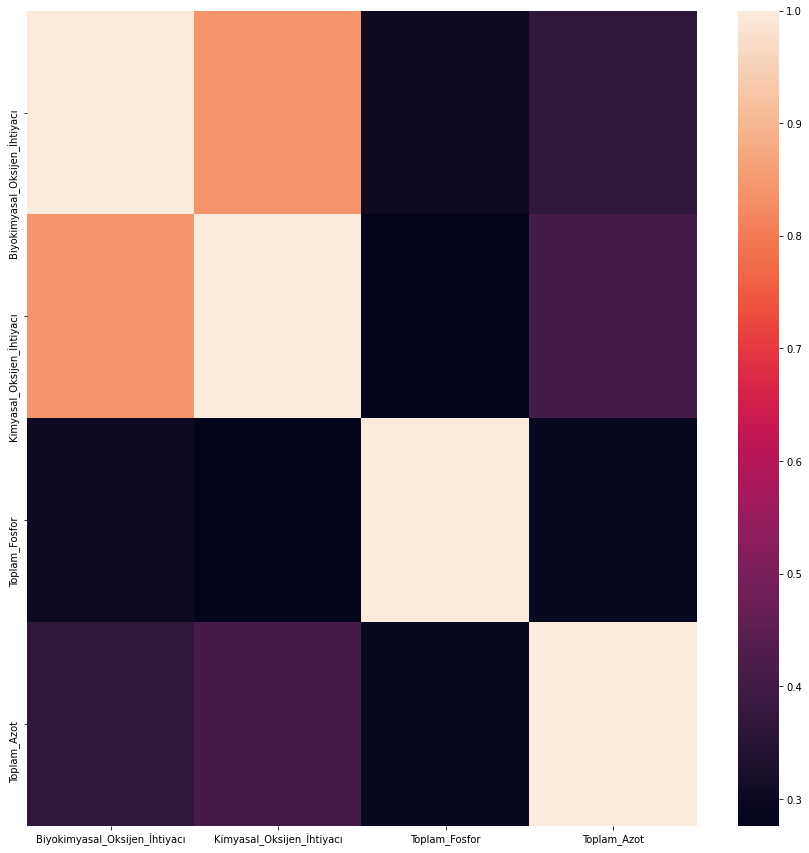

In [12]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(aritma_df.corr(), ax = ax)

Deleting outliers of akarsu

<ipython-input-13-dd51d7dc7757>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  akarsu_df.hist(ax = ax)


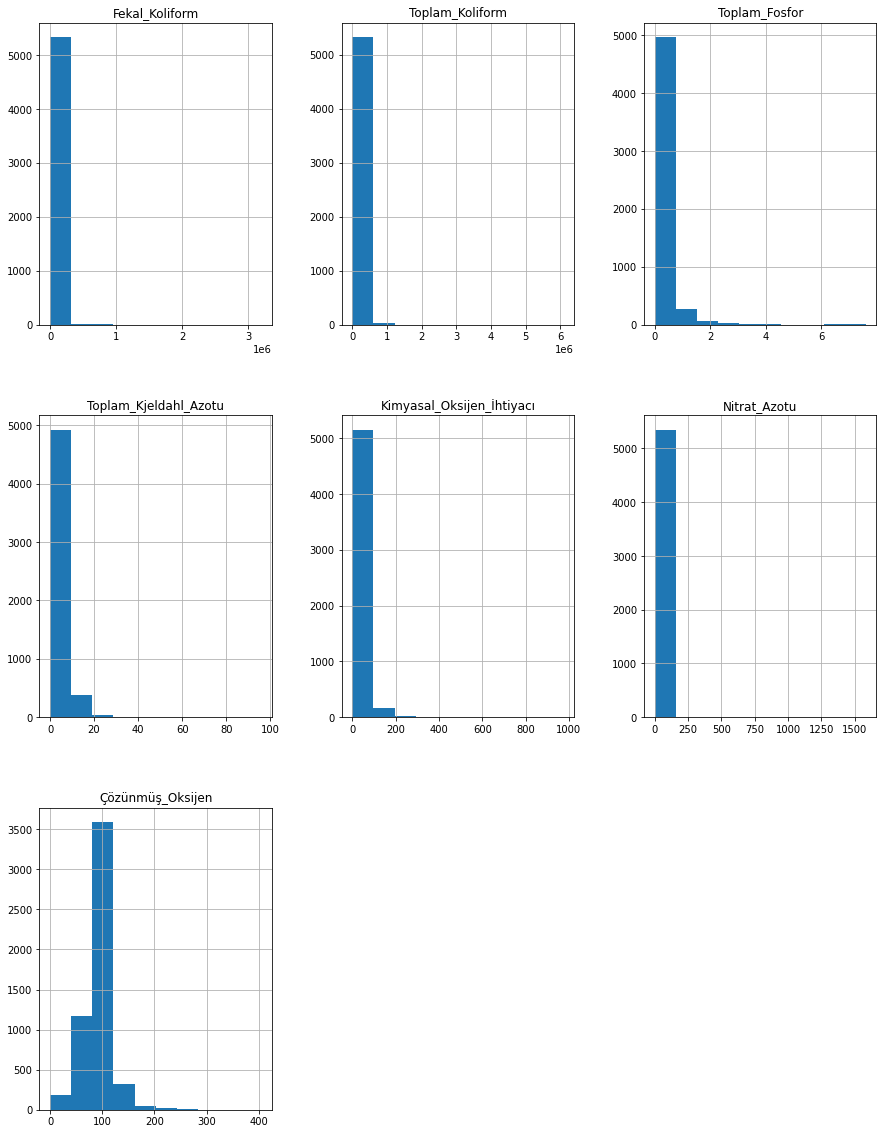

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()             
akarsu_df.hist(ax = ax)
new_akarsu = akarsu_df.copy()
for i in akarsu_outliers:
    index = new_akarsu[(new_akarsu[i] < new_akarsu[i].quantile(0.05))| (new_akarsu[i] > new_akarsu[i].quantile(0.9))].index
    new_akarsu.drop(index, inplace = True)

In [14]:
new_akarsu.describe()

,Fekal_Koliform,Toplam_Koliform,Toplam_Fosfor,Toplam_Kjeldahl_Azotu,Kimyasal_Oksijen_İhtiyacı,Nitrat_Azotu,Çözünmüş_Oksijen
count,2254.00,2254.00,2254.00,2254.00,2254.00,2254.00,2254.00
mean,607.96,1680.97,0.06,0.54,13.27,0.62,93.07
std,1639.57,3915.38,0.09,0.58,9.44,0.49,11.69
min,0.00,0.00,0.01,0.10,5.00,0.06,64.40
25%,0.00,20.00,0.01,0.19,5.00,0.20,83.93
50%,30.00,91.00,0.02,0.50,10.00,0.48,94.40
75%,300.00,1200.00,0.06,0.50,20.00,0.93,102.10
max,17200.00,25000.00,0.59,4.37,45.00,1.96,115.70


<ipython-input-15-d1d9c7450751>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  new_akarsu.hist(ax = ax);


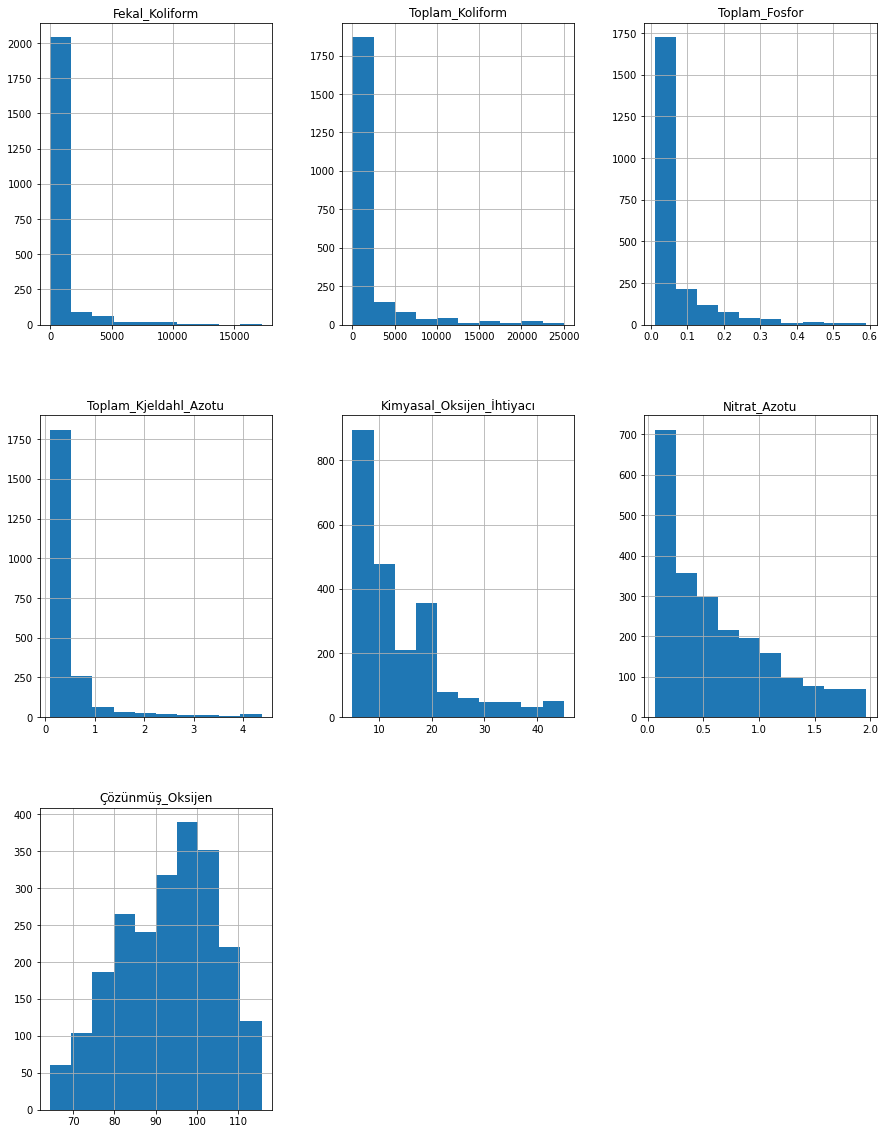

In [15]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()             
new_akarsu.hist(ax = ax);